## Image Classification  with MNIST Dataset  using neural network


In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


8


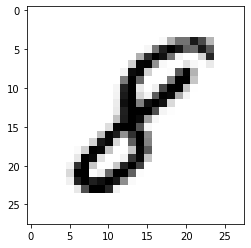

In [2]:
import matplotlib.pyplot as plt
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')


In [3]:
x_train.shape


(60000, 28, 28)

In [4]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])


x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [5]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))


In [6]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2107 - accuracy: 0.9369
Epoch 2/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0869 - accuracy: 0.9743
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0612 - accuracy: 0.9805
Epoch 4/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0456 - accuracy: 0.9856
Epoch 5/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0365 - accuracy: 0.9878
Epoch 6/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0297 - accuracy: 0.9900
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0252 - accuracy: 0.9915
Epoch 8/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0229 - accuracy: 0.9922
Epoch 9/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0213 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 25s 14m

Note- While training, the loss should decrease and the accuracy should increase.
If it is not the case, then try with different datasets, different neural network structure or tuning your parameters.


In [7]:
model.evaluate(x_test, y_test)


313/313 [==============================] - 1s 4ms/step - loss: 0.0583 - accuracy: 0.9846


[0.05828864127397537, 0.9846000075340271]

9


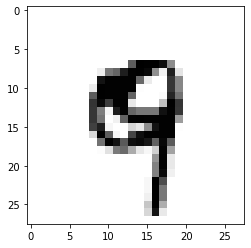

In [8]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())
